In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns
import jax
import jax.numpy as jnp

# Set matplotlib and seaborn plotting style
sns.set_style('darkgrid')
np.random.seed(42)

from gp import gaussian_process
from kernel import kernel_functions, preprocess
#

In [13]:
from operator import index
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import jax.numpy as jnp # ai-accelerator agnostic numpy implementations
import jax # autograd + XLA
from tensorflow_probability.substrates import jax as tfp # tensorflow probability
import seaborn as sns
import warnings
from kernel import kernel_functions, preprocess
warnings.filterwarnings("ignore")


In [14]:
tfd = tfp.distributions

ImportError: cannot import name 'bijectors' from partially initialized module 'tensorflow_probability.substrates.jax' (most likely due to a circular import) (/home/progyan.das/anaconda3/lib/python3.9/site-packages/tensorflow_probability/substrates/jax/__init__.py)

In [2]:
gauss = gaussian_process()
prep = preprocess()

reached here


In [3]:
def func(x):
    """Latent function.
    """
    return 1.0 * x**2 + \
           0.3 * x**1 + \
           2 * np.sin(4*x)

In [4]:
# Number of training examples
n = 8
# Number of inducing variables
m = 8
# Noise
sigma_y = 0.2

# Noisy training data
X = jnp.linspace(-1.0, 1.0, n).reshape(-1, 1)
y = func(X) + sigma_y * jax.random.normal(jax.random.PRNGKey(0), shape=(n, 1))

# Test data
X_test = np.linspace(-1.5, 1.5, 1000).reshape(-1, 1)
f_true = func(X_test)

# Inducing inputs
X_m = jnp.linspace(-0.4, 0.4, m).reshape(-1, 1)

Graph

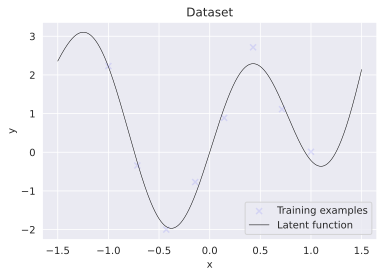

In [5]:
plt.scatter(X, y, label='Training examples', marker='x', color='blue', alpha=0.1)
plt.plot(X_test, f_true, label='Latent function', c='k', lw=0.5)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

KERNEL AND GP FUNCTIONS

In [6]:
n = 75  # Number of points in posterior (test points)
domain = (-1, 1)
x_linspace = np.linspace(domain[0], domain[1], n).reshape(-1, 1)

In [7]:
y_data = y.reshape([y.shape[0]])

In [8]:
def mysqrt(n):
    if n.any() < 0:
        return np.zeroes(n.size)
    else:
        return np.sqrt(n)

In [9]:
def jitter_matrix(dim_count: int, value = 1e-5):
        """
        Add jitter along diagonals to make sure matrix doesn't become singular.
        Reduces overfitting in many huge-input cases.
        """

        return jnp.eye(dim_count) * value

In [10]:
X

DeviceArray([[-1.        ],
             [-0.71428573],
             [-0.42857143],
             [-0.14285707],
             [ 0.1428572 ],
             [ 0.42857146],
             [ 0.71428585],
             [ 1.        ]], dtype=float32)

In [11]:
mu, cov = gauss.GaussianPosterior(x_data = X, y_data = y_data, x_input = x_linspace) 
sig = mysqrt(np.diag(cov))
# Draw some samples of the posterior
mu.size
cov.size

ValueError: operands could not be broadcast together with shapes (75,) (8,) 

In [23]:
y_out = np.random.multivariate_normal(mean=mu, cov=cov, size=10)

NameError: name 'mu' is not defined

In [12]:
kernel_functions.rbf_kernel(X,X)

DeviceArray([[1.        , 0.96000546, 0.84936583, 0.69256926, 0.5204501 ,
              0.3604478 , 0.23006624, 0.13533528],
             [0.96000546, 1.        , 0.96000546, 0.8493658 , 0.69256926,
              0.5204501 , 0.3604477 , 0.2300663 ],
             [0.84936583, 0.96000546, 1.        , 0.9600054 , 0.84936583,
              0.6925693 , 0.52045006, 0.3604478 ],
             [0.69256926, 0.8493658 , 0.9600054 , 1.        , 0.96000546,
              0.84936583, 0.69256926, 0.5204502 ],
             [0.5204501 , 0.69256926, 0.84936583, 0.96000546, 1.        ,
              0.96000546, 0.8493658 , 0.6925694 ],
             [0.3604478 , 0.5204501 , 0.6925693 , 0.84936583, 0.96000546,
              1.        , 0.9600054 , 0.84936583],
             [0.23006624, 0.3604477 , 0.52045006, 0.69256926, 0.8493658 ,
              0.9600054 , 1.        , 0.96000546],
             [0.13533528, 0.2300663 , 0.3604478 , 0.5204502 , 0.6925694 ,
              0.84936583, 0.96000546, 1.        ]],

NameError: name 'mu' is not defined

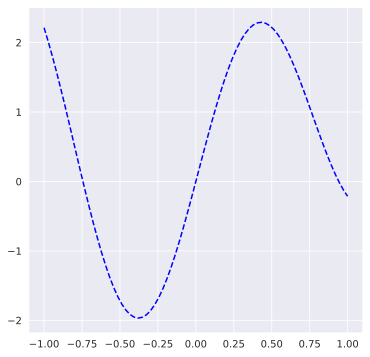

In [24]:
# Plot the postior distribution and some samples
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_linspace, func(x_linspace), 'b--', label='$sin(x)$')
ax1.fill_between(x_linspace.flat, mu-2*0.5, mu+2*0.5, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_linspace, mu, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X, y, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([-1, 1, -3, 3])